# Project on The Twitter sentiment analysis : Classification 

 Loading the Twitter Train and Test datasets

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/project/Twitter_cv/twitter_training.csv")

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.columns=["Tweet ID","Entity","Sentiment","Tweet Content"]

In [5]:
df.drop(["Tweet ID"],axis=1,inplace=True)

In [6]:
df.head()

,Entity,Sentiment,Tweet Content
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.shape

(74681, 3)

# Data Cleaning Model bulding¶
Identifying the column datatypes and Droping the unneccesary columns

In [8]:
df.describe()

,Entity,Sentiment,Tweet Content
count,74681,74681,73995
unique,32,4,69490
top,TomClancysRainbowSix,Negative,
freq,2400,22542,172


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Entity         74681 non-null  object
 1   Sentiment      74681 non-null  object
 2   Tweet Content  73995 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


### Identifying the null values

In [10]:
df.isnull().sum()

Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [11]:
df.dropna(subset=["Tweet Content"],inplace=True)

In [12]:
df.isnull().sum()

Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

In [13]:
df.columns

Index(['Entity', 'Sentiment', 'Tweet Content'], dtype='object')

In [14]:
df["Entity"].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [15]:
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [16]:
df["Sentiment"].replace({"Positive":1,"Negative":0,"Neutral":2,"Irrelevant":3},inplace=True)

# Encoding the object columns using label encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Entity"] = encoder.fit_transform(df["Entity"])

In [18]:
y = df["Sentiment"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Sentiment, dtype: int64

In [19]:
X = df["Tweet Content"]
X.shape

(73995,)

# Model Bulding
Preparing data for model building

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=42)

# Classification model building using naiveBayes

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf = Pipeline([("Vectorizer",TfidfVectorizer()),("model",MultinomialNB())])
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7217379552672478

# Predicting the test values 
we have to predict that  wheather the message is belonging to Positive, Neutral, Negative, Irrelevant Entity

In [22]:
y_pred = clf.predict(X_test)
y_pred[10:15]

array([0, 3, 1, 2, 0], dtype=int64)

In [23]:
y_test[10:15]

69605    3
43387    3
42725    3
777      2
44120    0
Name: Sentiment, dtype: int64

<Axes: >

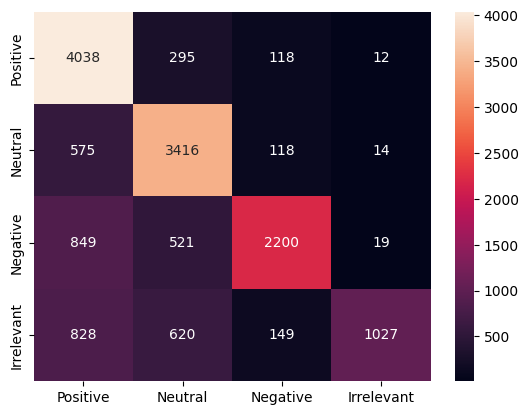

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
label = ['Positive', 'Neutral', 'Negative', 'Irrelevant']
sns.heatmap(cm,annot=True,fmt="d",xticklabels=label,yticklabels=label)

# Classification model building using LogisticRegression

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([("Vectorizer",TfidfVectorizer()),("model",LogisticRegression())])

In [26]:
clf.fit(X_train,y_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [27]:
clf.score(X_test,y_test)

0.7880262179877019

# Predicting the test values
Predicting the output for the test data

In [28]:
y_pred = clf.predict(X_test)
y_pred[10:15]

array([3, 3, 1, 2, 0], dtype=int64)

In [29]:
y_test[10:15]

69605    3
43387    3
42725    3
777      2
44120    0
Name: Sentiment, dtype: int64

<Axes: >

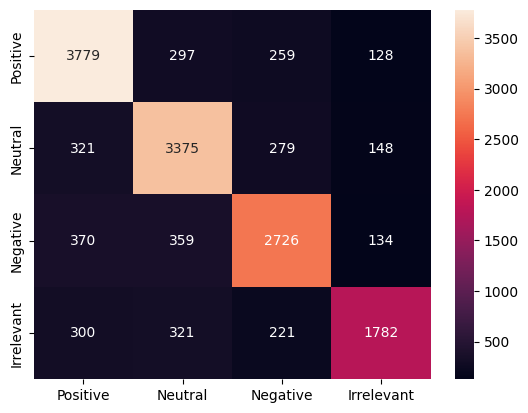

In [30]:
cm = confusion_matrix(y_test,y_pred)
label = ['Positive', 'Neutral', 'Negative', 'Irrelevant']
sns.heatmap(cm,annot=True,fmt="d",xticklabels=label,yticklabels=label)


# LogisticRegression accuracy is greater than naiveBayes

In [31]:
new_msg = ["CSGO WIngman (Im Silver dont bully) twitch.tv/lprezh"]
clf.predict(new_msg)

array([2], dtype=int64)

# Classification Report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4770
           1       0.82      0.78      0.80      4352
           2       0.76      0.78      0.77      3485
           3       0.68      0.81      0.74      2192

    accuracy                           0.79     14799
   macro avg       0.78      0.79      0.78     14799
weighted avg       0.79      0.79      0.79     14799

